In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Задание 1
Обучите модель KNN для задачи классификации на данном 'игрушечном' датасете. При обучении следует подобрать оптимальные гиперпараметры для модели. Для оценки задания требуется:

1) Привести признаки к единному масштабу

2) Вывести метрику (accuracy) на валидации

3) Вывести лучшие гиперпараметры

В дальнейших требованиях к оценке не будет 1 пункта, и не приведение признаков к единному масштабу будет считаться ошибкой.

In [3]:
np.random.seed(42)

X, y = make_blobs(n_samples=300, centers=4, n_features=2)

X[:, 0] += 10000
X[:, 1] += 100

Отобразим тренировочный набор

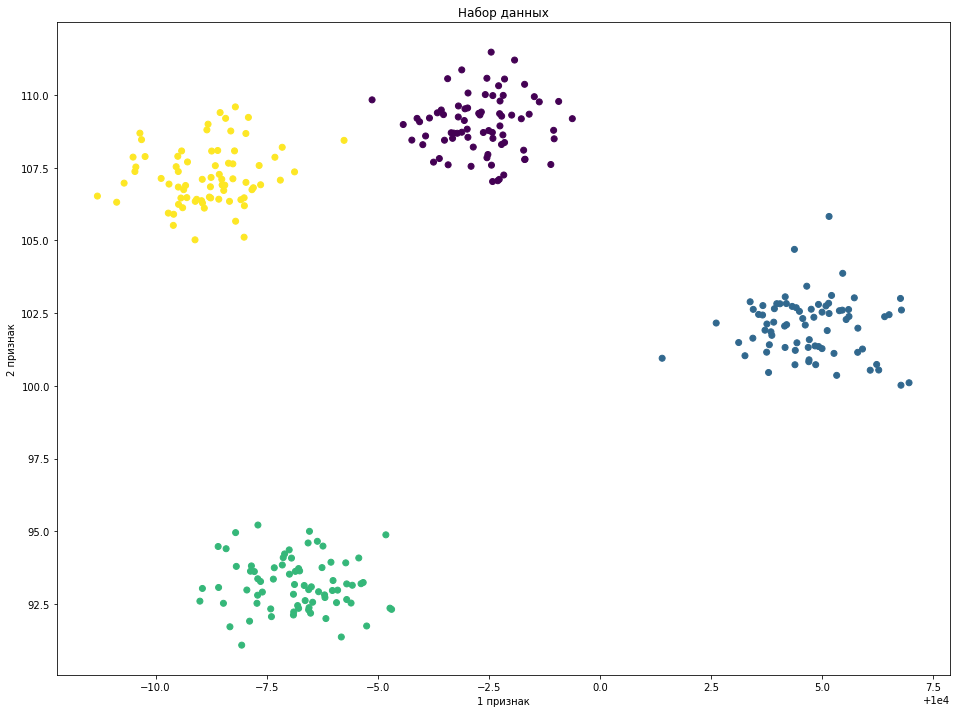

In [8]:
plt.figure(figsize=(16, 12))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Набор данных')
plt.xlabel('1 признак')
plt.ylabel('2 признак');

# Задание 2
Создайте модель для прогнозирования цен домов в калифорнии с учётом координат. Для оценки задания требуется:

1) Вывести метрику (mean_absolute_error)

2) Вывести лучшие гиперпараметры

3) Вывод по обученной модели (попытатся объяснить полученной результат/ошибку)

4) Дополнительно: попробуйте добавить еще числовых признаков в вашу модель (постарайтесь использовать ваши знания о реальном мире) для решения нашей задачей с помощью KNN.

In [19]:
df = pd.read_csv('../Данные/housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Посмотрим распределение признаков

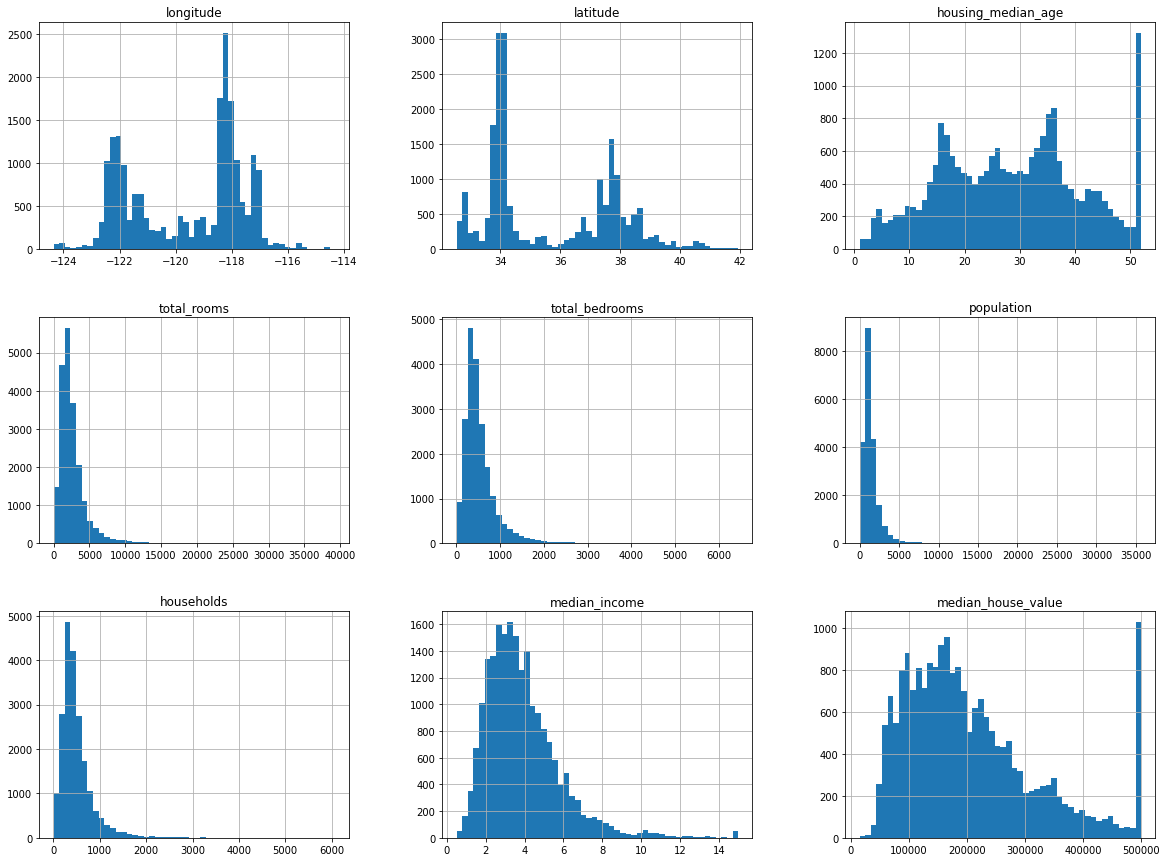

In [20]:
df.hist(bins=50, figsize=(20, 15));

Выведем координаты домов из тренировочного датасета

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

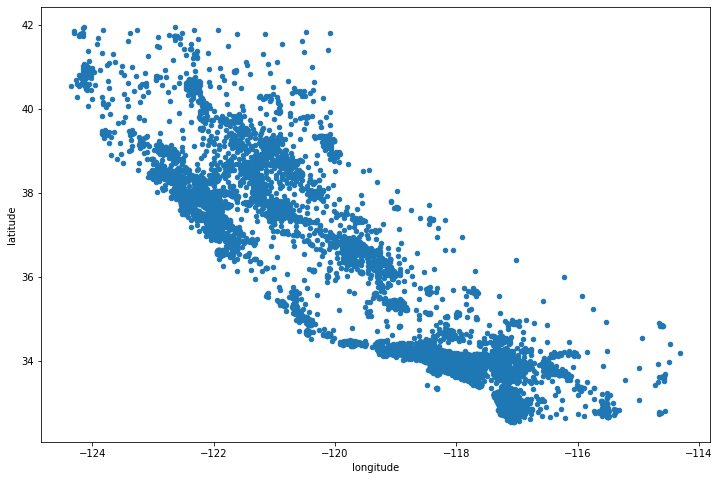

In [25]:
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(12, 8))

А теперь посмотрим на более информативный график

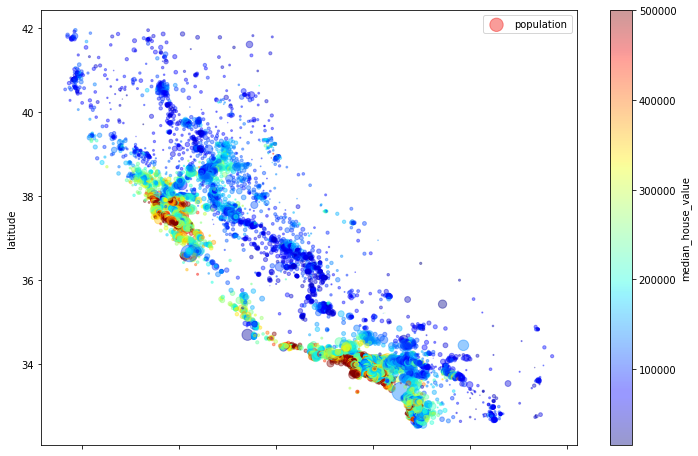

In [32]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=df['population']/100, label='population', c='median_house_value',
        cmap=plt.get_cmap('jet'), figsize=(12, 8), colorbar=True);

In [39]:
# Добавляем признаки
# при добавлении признаков не забываем про их масштаб
X = df[["latitude", "longitude", "median_house_value"]]

# Убираем целевой признак, иначе утечка данных
X = X.drop("median_house_value", axis=1)

# Переводим в единицы 1000 доларов
y = df["median_house_value"] / 1000

## Обучаем модель

# Задание 3
Обучить KNN классификатор на датасете ирисов. Для оценки задания вам требуется:

1) Вывести метрику (accuracy)

2) Вывести лучшие гиперпараметры

3) Вывод по обученной модели (попытатся объяснить полученной результат/ошибку)

In [40]:
iris = load_iris()
X = iris["data"]
y = iris["target"]

In [68]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


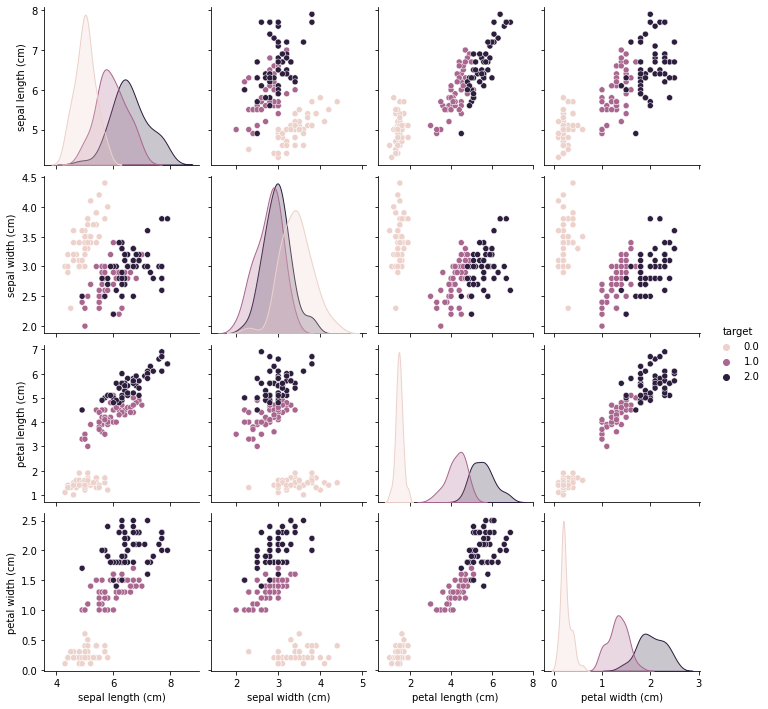

In [72]:
sns.pairplot(df, hue='target');

## Обучение модели